# Statistiche del terzo scenario (Health Gathering Supreme) 

In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

# No ROE Vs. ROE Vs. ulteriori varianti

- ROE (primo tentativo)
- ROE + strato conv. aggiuntivo (32 filtri)
- ROE + strato conv. aggiuntivo (64 filtri) + modifiche ai coeff. eventi
- no ROE

In [2]:
''' Tentativo senza ROE '''
with open("health-supreme-pessimo2.json") as json_file:
    health_gathering_supreme5 = json.load(json_file)
''' ROE '''
with open("health-supreme-secondo-tentativoROE.json") as json_file:
    health_gathering_supreme2 = json.load(json_file)
with open("health-supreme-tentativo-con-strato-inpiu(32filtri).json") as json_file:
    health_gathering_supreme3 = json.load(json_file)
with open("health-supreme-finale.json") as json_file:
    health_gathering_supreme4 = json.load(json_file)

## Train Scores

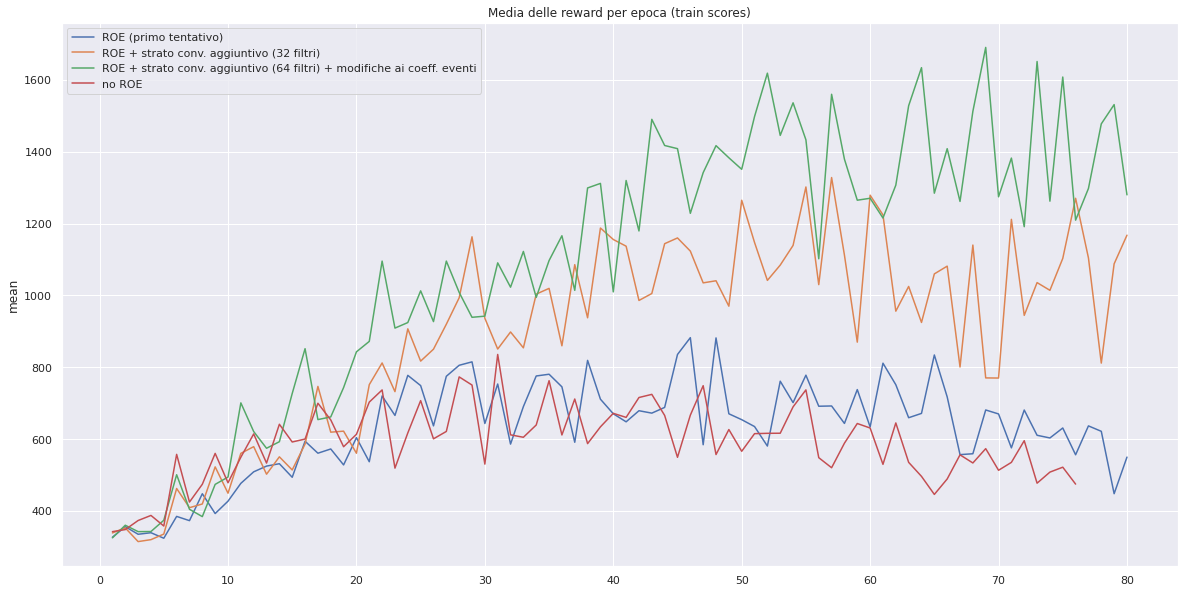

In [3]:
data2 = pd.DataFrame(health_gathering_supreme2["train_scores"])
data3 = pd.DataFrame(health_gathering_supreme3["train_scores"])
data4 = pd.DataFrame(health_gathering_supreme4["train_scores"])

data5 = pd.DataFrame(health_gathering_supreme5["train_scores"])

plot = sns.lineplot(data=data2, x = range(1, health_gathering_supreme2["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, health_gathering_supreme3["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data4, x = range(1, health_gathering_supreme4["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data5, x = range(1, health_gathering_supreme5["epochs"] + 1), y="mean")
plt.legend(labels=["ROE (primo tentativo)","ROE + strato conv. aggiuntivo (32 filtri)", "ROE + strato conv. aggiuntivo (64 filtri) + modifiche ai coeff. eventi","no ROE"])
plt.title('Media delle reward per epoca (train scores)')
plt.show()

## Test Scores

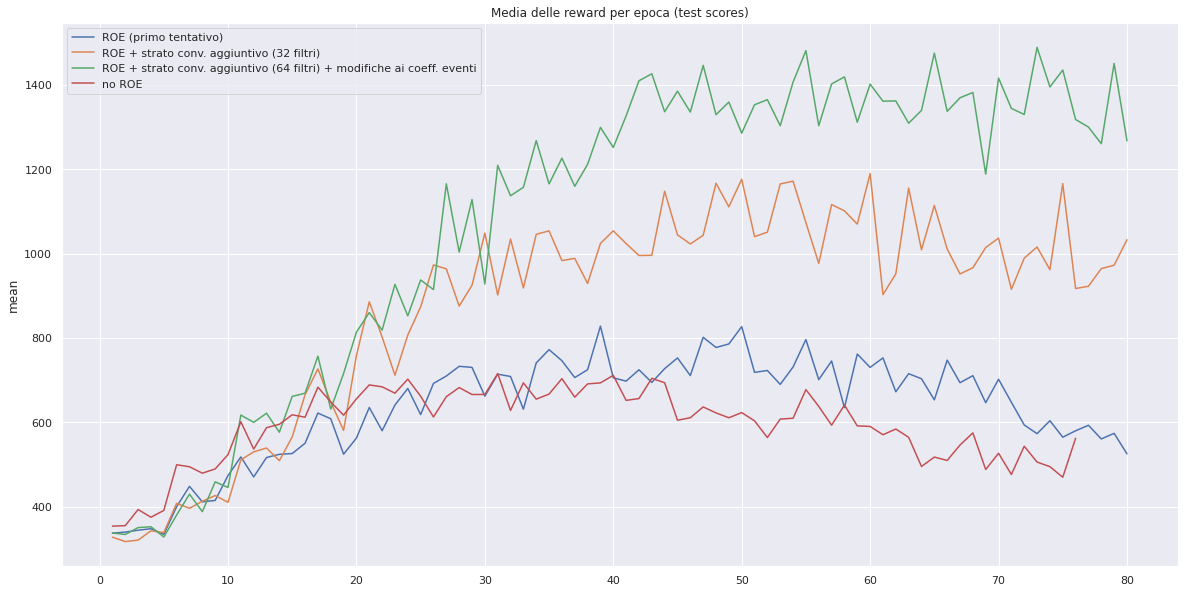

In [4]:
data2 = pd.DataFrame(health_gathering_supreme2["test_scores"])
data3 = pd.DataFrame(health_gathering_supreme3["test_scores"])
data4 = pd.DataFrame(health_gathering_supreme4["test_scores"])

data5 = pd.DataFrame(health_gathering_supreme5["test_scores"])

plot = sns.lineplot(data=data2, x = range(1, health_gathering_supreme2["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, health_gathering_supreme3["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data4, x = range(1, health_gathering_supreme4["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data5, x = range(1, health_gathering_supreme5["epochs"] + 1), y="mean")
plt.legend(labels=["ROE (primo tentativo)","ROE + strato conv. aggiuntivo (32 filtri)", "ROE + strato conv. aggiuntivo (64 filtri) + modifiche ai coeff. eventi","no ROE"])
plt.title('Media delle reward per epoca (test scores)')
plt.show()

## Loss Scores

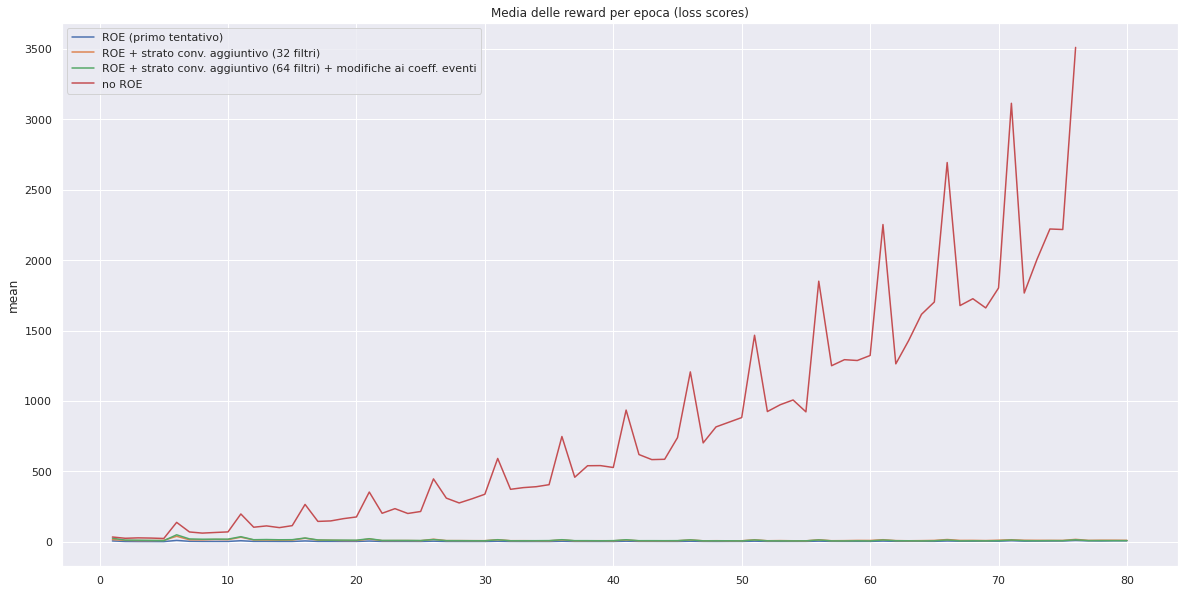

In [5]:
data2 = pd.DataFrame(health_gathering_supreme2["loss"])
data3 = pd.DataFrame(health_gathering_supreme3["loss"])
data4 = pd.DataFrame(health_gathering_supreme4["loss"])

data5 = pd.DataFrame(health_gathering_supreme5["loss"])

plot = sns.lineplot(data=data2, x = range(1, health_gathering_supreme2["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, health_gathering_supreme3["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data4, x = range(1, health_gathering_supreme4["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data5, x = range(1, health_gathering_supreme5["epochs"] + 1), y="mean")
plt.legend(labels=["ROE (primo tentativo)","ROE + strato conv. aggiuntivo (32 filtri)", "ROE + strato conv. aggiuntivo (64 filtri) + modifiche ai coeff. eventi","no ROE"])
plt.title('Media delle reward per epoca (loss scores)')
plt.show()

#### Per apprezzare meglio i valori, si elimina dalla visualizzazione il modello "no ROE"

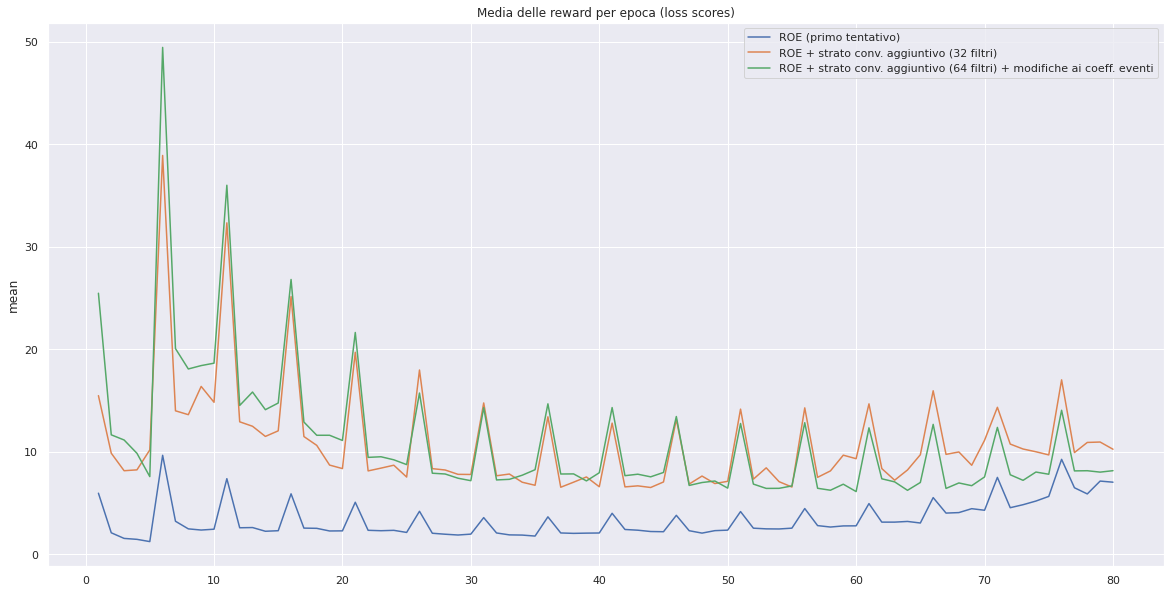

In [6]:
data2 = pd.DataFrame(health_gathering_supreme2["loss"])
data3 = pd.DataFrame(health_gathering_supreme3["loss"])
data4 = pd.DataFrame(health_gathering_supreme4["loss"])

plot = sns.lineplot(data=data2, x = range(1, health_gathering_supreme2["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data3, x = range(1, health_gathering_supreme3["epochs"] + 1), y="mean")
plot = sns.lineplot(data=data4, x = range(1, health_gathering_supreme4["epochs"] + 1), y="mean")
plt.legend(labels=["ROE (primo tentativo)","ROE + strato conv. aggiuntivo (32 filtri)", "ROE + strato conv. aggiuntivo (64 filtri) + modifiche ai coeff. eventi"])
plt.title('Media delle reward per epoca (loss scores)')
plt.show()

## Tempo di addestramento

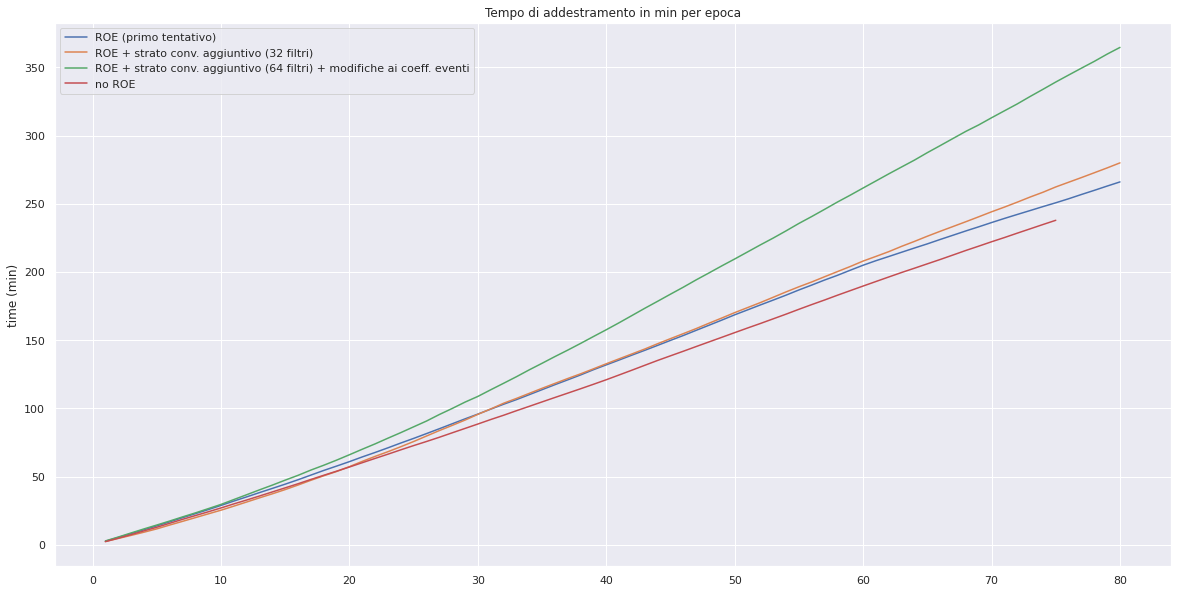

In [7]:
data2 = pd.DataFrame(health_gathering_supreme2["time"], columns=["time (min)"])
data3 = pd.DataFrame(health_gathering_supreme3["time"], columns=["time (min)"])
data4 = pd.DataFrame(health_gathering_supreme4["time"], columns=["time (min)"])

data5 = pd.DataFrame(health_gathering_supreme5["time"], columns=["time (min)"])

plot = sns.lineplot(data=data2, x = range(1, len(data2) + 1), y = "time (min)")
plot = sns.lineplot(data=data3, x = range(1, len(data3) + 1), y = "time (min)")
plot = sns.lineplot(data=data4, x = range(1, len(data4) + 1), y = "time (min)")
plot = sns.lineplot(data=data5, x = range(1, len(data5) + 1), y = "time (min)")
plt.legend(labels=["ROE (primo tentativo)","ROE + strato conv. aggiuntivo (32 filtri)", "ROE + strato conv. aggiuntivo (64 filtri) + modifiche ai coeff. eventi","no ROE"])
plt.title('Tempo di addestramento in min per epoca')
plt.show()

#### Seguono ora dei grafici relativi alle statistiche degli eventi relative al miglior modello per lo scenario in questione
Vista l'introduzione del _Rarity of Events_ si è pensato di modificare il codice affinché si potesse analizare il vettore degli eventi medio e la reward intrinsica per ciascun epoca. Ovviamente tutte le statistiche che seguiranno sono state raccolte nella fase di training.

In [8]:
with open("health-supreme-eventi.json") as json_file:
    stats_event = json.load(json_file)

    reward = pd.DataFrame(stats_event["reward"])
    medkit_pickup = pd.DataFrame(stats_event["medkit_pickup"])
    poison_pickup = pd.DataFrame(stats_event["poison_pickup"])
    health = pd.DataFrame(stats_event["health"])
    distance = pd.DataFrame(stats_event["distance"])
    velocity = pd.DataFrame(stats_event["velocity"])
    done = pd.DataFrame(stats_event["done"])

## Reward intrinseca

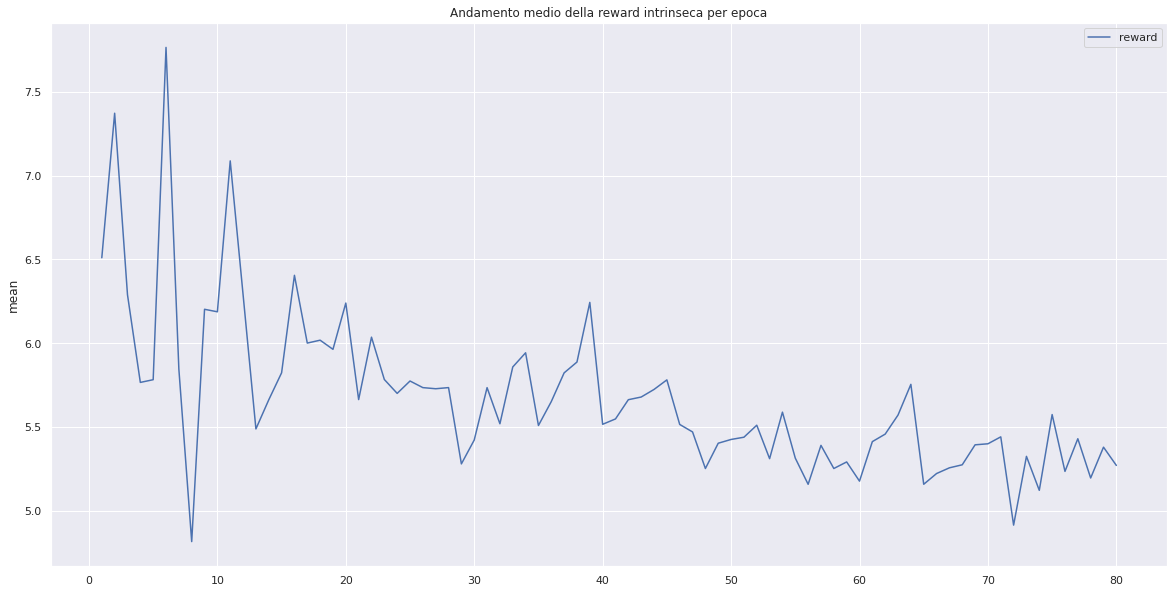

In [9]:
plot = sns.lineplot(data=reward, x = range(1,len(medkit_pickup) + 1), y="mean")
plt.legend(labels=["reward"])
plt.title('Andamento medio della reward intrinseca per epoca')
plt.show()

## Medkit Vs. Veleno

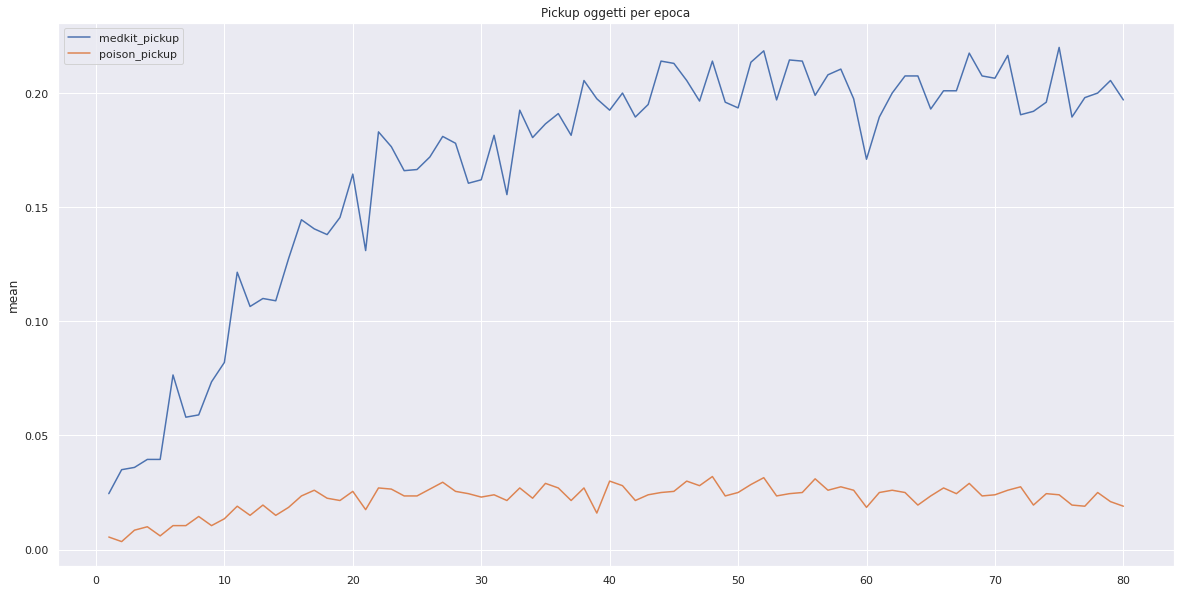

In [10]:
plot = sns.lineplot(data=medkit_pickup, x = range(1,len(reward) + 1), y="mean")
plot = sns.lineplot(data=poison_pickup, x = range(1,len(reward) + 1), y="mean")
plt.legend(labels=["medkit_pickup","poison_pickup"])
plt.title('Pickup oggetti per epoca')
plt.show()

## Health

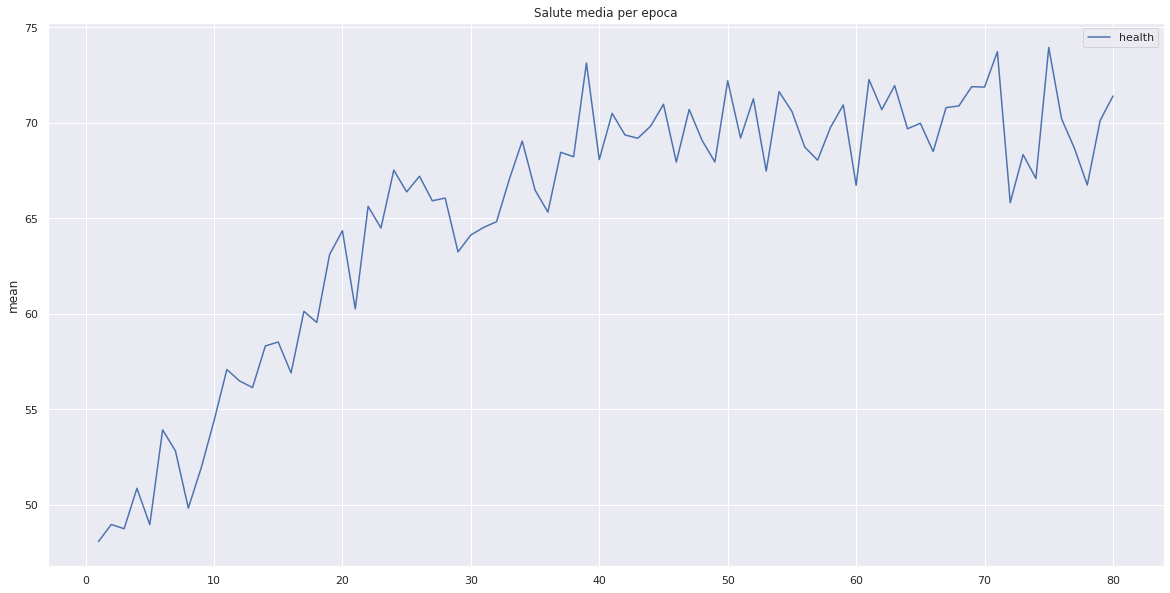

In [11]:
plot = sns.lineplot(data=health, x = range(1,len(reward) + 1), y="mean")
plt.legend(labels=["health"])
plt.title('Salute media per epoca')
plt.show()

## Distanza Vs. Velocità

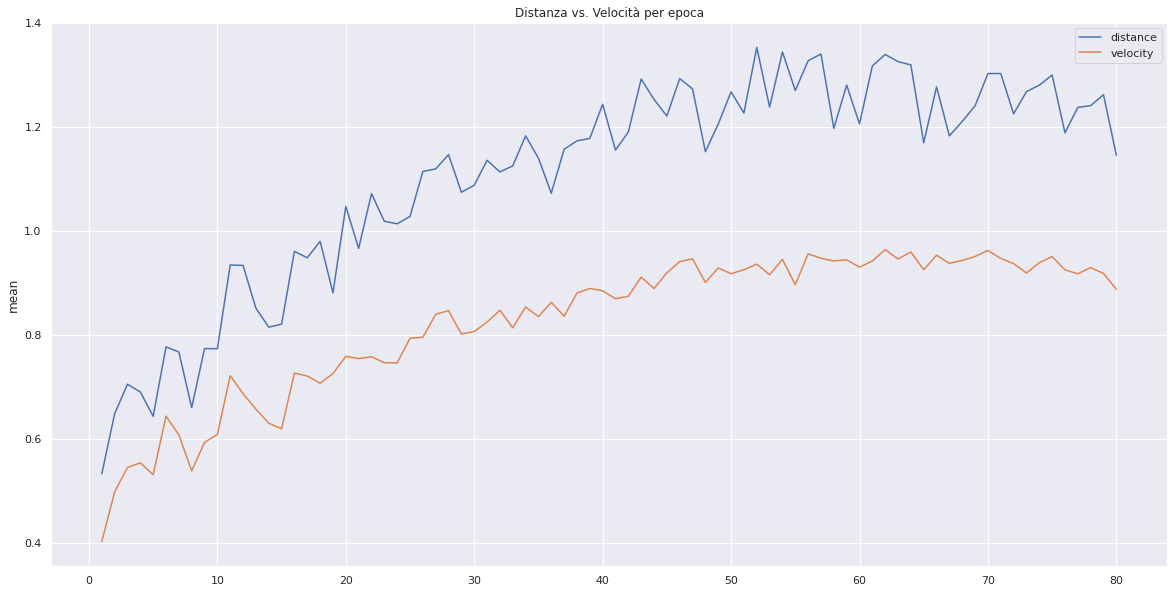

In [12]:
plot = sns.lineplot(data=distance, x = range(1,len(reward) + 1), y="mean")
plot = sns.lineplot(data=velocity, x = range(1,len(reward) + 1), y="mean")
plt.legend(labels=["distance","velocity"])
plt.title('Distanza vs. Velocità per epoca')
plt.show()

## Done
Reciproco del numero di episodi conclusi per ogni epoca. Un basso valore di done indica una tempo di sopravvivenza dell'agente maggiore.

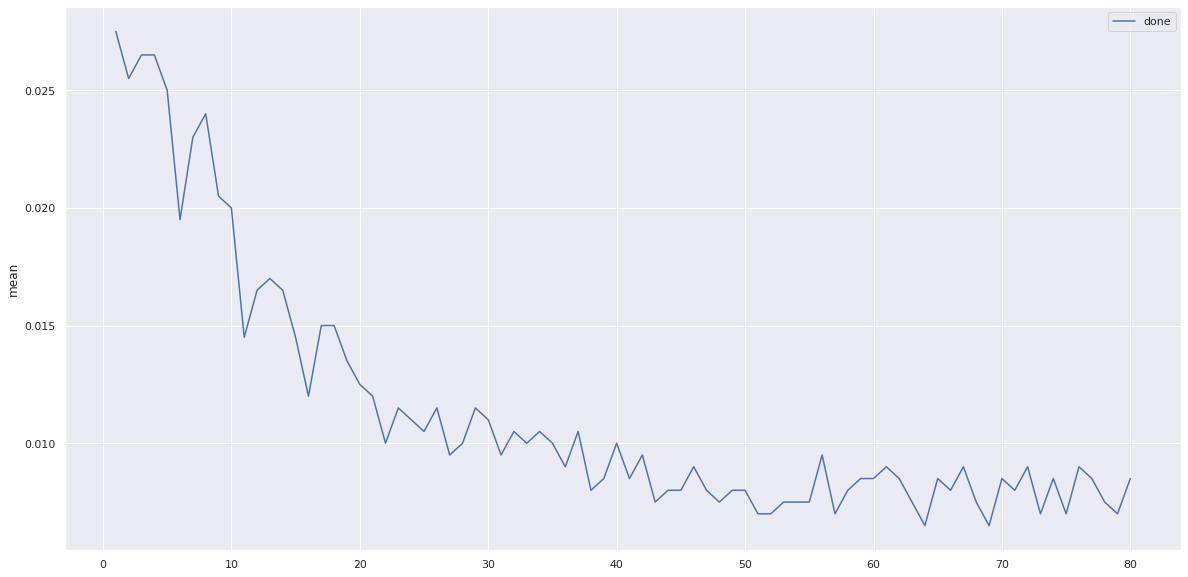

In [13]:
plt = sns.lineplot(data=done, x = range(1,len(reward) + 1), y="mean")
a = plt.legend(labels=["done"])